In [22]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
BATCH_SIZE = 50
NUMBER_OF_FEATURES = 1
NUMBER_OF_EXAMPLES = 5000

def gen_y(X):
    return np.sin(X)

X_train = 4 * np.pi * np.random.rand(NUMBER_OF_EXAMPLES, NUMBER_OF_FEATURES)
Y_train = gen_y(X_train)

X_test = 4 * np.pi * np.random.rand(200, NUMBER_OF_FEATURES)
y_test = gen_y(X_test)

assert X_train.shape == (NUMBER_OF_EXAMPLES, NUMBER_OF_FEATURES)
assert Y_train.shape == (NUMBER_OF_EXAMPLES, 1)

In [51]:
from neural_network import NeuralNetwork, Dense, Sigmoid, MSE

nn = NeuralNetwork()

nn.add_layer(Dense(NUMBER_OF_FEATURES, 10))
nn.add_layer(Sigmoid())
nn.add_layer(Dense(10, 1))

loss_history = nn.train(
  X_train, 
  Y_train,
  epochs=500,
  batch_size=BATCH_SIZE, 
  learning_rate=0.1,
  loss=MSE()
)

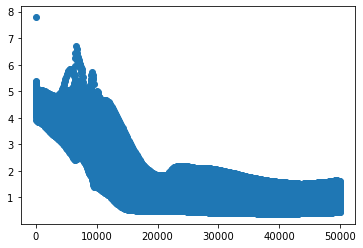

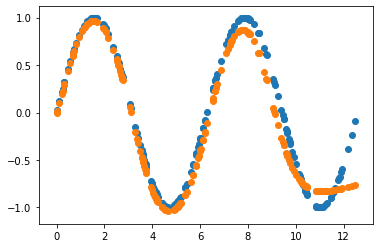

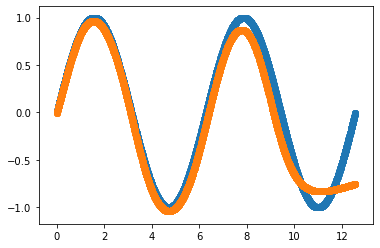

In [52]:
plt.scatter(range(len(loss_history)), loss_history)
plt.show()


plt.scatter(X_test, y_test, label='true')
plt.scatter(X_test, nn.forward(X_test), label='predicted')
plt.show()

plt.scatter(X_train, Y_train)
plt.scatter(X_train, nn.forward(X_train))
plt.show()